In [34]:
import json
import requests

# Retrieve data from API
wallet_address='0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be'
url = "https://web3api.io/api/v1/addresses/" + wallet_address + "/account-balances/historical?includePrice=true"
headers = {'content-type': 'application/json', 'x-api-key': '<ENTER_YOUR_API_KEY_HERE>'}

response = requests.get(url, headers=headers, verify=True)
if (not response.ok): # response.status_code
    response.raise_for_status()

# Parse JSON data
jData = json.loads(response.content)

In [35]:
import datetime
import pandas as pd

# Load & transform JSON data into Data Frame
df = pd.DataFrame(jData['payload']['data'], columns=jData['payload']['metadata']['columns'])
df['timestamp'] = df['timestamp'].apply(lambda x: datetime.datetime.fromtimestamp(x/1000))
df['price'] = df['price'].astype('float64')
df['value'] = df['value'].astype('float64')
df.head(5)

,address,blockNumber,timestamp,timestampNanoseconds,value,price
0,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,8644858,2019-09-29 09:55:13,0,9.129411e+22,1.554745e+07
1,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,8644852,2019-09-29 09:53:40,0,9.129412e+22,1.554571e+07
2,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,8644851,2019-09-29 09:53:34,0,9.129454e+22,1.554578e+07
3,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,8644848,2019-09-29 09:52:23,0,9.129455e+22,1.554579e+07
4,0x3f5ce5fbfe3e9af3971dd833d26ba9b5c936f0be,8644844,2019-09-29 09:51:57,0,9.129455e+22,1.554579e+07


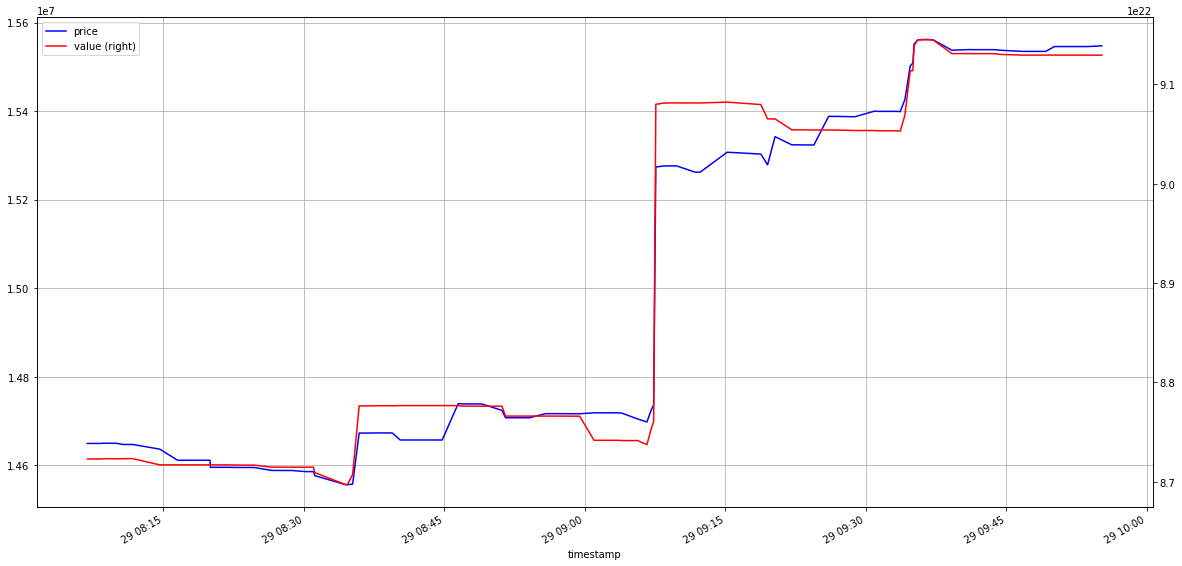

In [36]:
import matplotlib.pyplot as plt

# Plot account balance time series
fig, ax = plt.subplots(figsize=(20, 10))
ax = df.plot(ax=ax, kind='line', x='timestamp', y='price', c='Blue', grid=True, style='b')
ax = df.plot(ax=ax, kind='line', x='timestamp', y='value', c='Red',  grid=True, style='b', secondary_y=True)
plt.show()